In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout


In [ ]:
def build_collatz_reverse_tree(depth=10, root=1):
    G = nx.DiGraph()
    G.add_node(root)

    def add_predecessors(n, current_depth):
        if current_depth >= depth:
            return

        child1 = n * 2
        if not G.has_node(child1):
            G.add_node(child1)
        G.add_edge(child1, n)
        add_predecessors(child1, current_depth + 1)

        if (n - 1) % 3 == 0:
            x = (n - 1) // 3
            if x % 2 == 1 and x > 0:
                if not G.has_node(x):
                    G.add_node(x)
                G.add_edge(x, n)
                add_predecessors(x, current_depth + 1)

    add_predecessors(root, 0)
    return G

In [23]:
def plot_graph(G):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", arrows=True)
    plt.title("Albero inverso Collatz")
    plt.show()
    
def plot_graph_as_tree(G):
    plt.figure(figsize=(14, 10))
    pos = graphviz_layout(G, prog='dot')  # Usa layout 'dot' (verticale ad albero)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", arrows=True)
    plt.title("Albero Collatz inverso")
    plt.show()

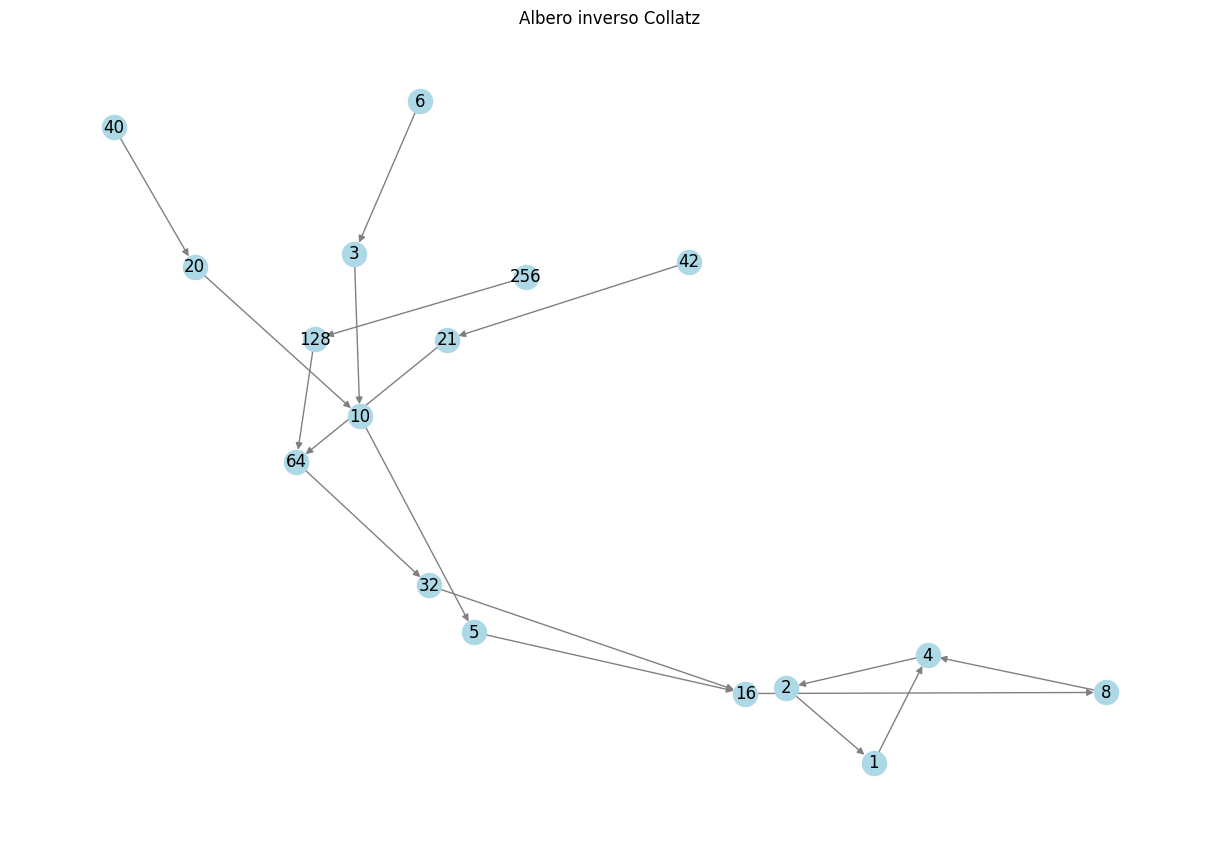

In [25]:
G = build_collatz_reverse_tree(depth=8)
plot_graph(G)